In [39]:
import os
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image 
from keras import *
import numpy as np
import cv2 as ocv
import pandas as pd
import matplotlib.pyplot as plt
from numpy.random import rand, shuffle
plt.style.use('dark_background')
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 
import tensorflow as tf
from tensorflow.keras import models, layers

In [40]:
encoder = OneHotEncoder()
encoder.fit([[0], [1]]) 

# 0 - yes (Tumor)
# 1 - no  (Normal)

OneHotEncoder()

In [43]:
dir = 'Brain'
classes = ['yes','no']
Data = []
Lables = []
for category in os.listdir(dir):
    #Newdir = 'C:\\Users\\Bahaa\\Desktop\\DataSets\\xray_dataset_covid19\\train\\NORMAL\\'
    #C:\\Users\\DOC\\Desktop\\DataSets\\xray_dataset_covid19\\train\\NORMAL
    newPath = os.path.join(dir,category)
    for img in os.listdir(newPath):
        img_path = os.path.join(newPath,img)
        if 'Thumbs.db' not in img_path:
            print(img_path)
            Data.append(((ocv.resize(ocv.imread(img_path,0),(100,100)))))
            Lables.append(classes.index(category))
combined = list(zip(Data,Lables))
shuffle(combined)
Data[:],Lables[:] = zip(*combined)
DATA = np.array(Data)
LABELS = np.array(Lables)
LABELS = np_utils.to_categorical(LABELS)
X_train, X_test, y_train, y_test = train_test_split(DATA, LABELS, random_state=0, train_size = .75)

print(np.shape(X_train))
print(np.shape(y_train))
#Data Augmentation
#dataGen = ImageDataGenerator(rotation_range=20,width_shift_range=0.01,height_shift_range=0.01,horizontal_flip=False,vertical_flip=False)
#dataGen.fit(X_train)

Brain\no\1 no.jpeg
Brain\no\10 no.jpg
Brain\no\11 no.jpg
Brain\no\12 no.jpg
Brain\no\13 no.jpg
Brain\no\14 no.jpg
Brain\no\15 no.jpg
Brain\no\17 no.jpg
Brain\no\18 no.jpg
Brain\no\19 no.jpg
Brain\no\2 no.jpeg
Brain\no\20 no.jpg
Brain\no\21 no.jpg
Brain\no\22 no.jpg
Brain\no\23 no.jpg
Brain\no\24 no.jpg
Brain\no\25 no.jpg
Brain\no\26 no.jpg
Brain\no\27 no.jpg
Brain\no\28 no.jpg
Brain\no\29 no.jpg
Brain\no\3 no.jpg
Brain\no\30 no.jpg
Brain\no\31 no.jpg
Brain\no\32 no.jpg
Brain\no\33 no.jpg
Brain\no\34 no.jpg
Brain\no\35 no.jpg
Brain\no\36 no.jpg
Brain\no\37 no.jpg
Brain\no\38 no.jpg
Brain\no\39 no.jpg
Brain\no\4 no.jpg
Brain\no\40 no.jpg
Brain\no\41 no.jpg
Brain\no\42 no.jpg
Brain\no\43 no.jpg
Brain\no\44no.jpg
Brain\no\45 no.jpg
Brain\no\46 no.jpg
Brain\no\47 no.jpg
Brain\no\48 no.jpeg
Brain\no\49 no.jpg
Brain\no\5 no.jpg
Brain\no\50 no.jpg
Brain\no\6 no.jpg
Brain\no\7 no.jpg
Brain\no\8 no.jpg
Brain\no\9 no.jpg
Brain\no\N1.JPG
Brain\no\N11.jpg
Brain\no\N15.jpg
Brain\no\N16.jpg
Brain\no\

In [47]:
model = Sequential()
IMAGE_WIDTH=100
IMAGE_HEIGHT=100
IMAGE_CHANNELS=1
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH,IMAGE_HEIGHT,IMAGE_CHANNELS)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))


model.compile(loss = "binary_crossentropy", metrics=['accuracy'])
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 98, 98, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 49, 49, 32)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 21, 21, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 10, 10, 128)     

In [48]:
y_train.shape

(189, 2)

In [49]:
history = model.fit(X_train, y_train, epochs = 10, batch_size = 40, verbose = 2,validation_data = (X_test, y_test))


ValueError: Data cardinality is ambiguous:
  x sizes: 111
  y sizes: 189
Make sure all arrays contain the same number of samples.

In [12]:
def names(number):
    if number==0:
        return 'Its a Tumor'
    else:
        return 'No, Its not a tumor'

In [13]:
from matplotlib.pyplot import imshow
img = Image.open("no1.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
confidence = str(res[0][classification]*100)
print(confidence + '% Confidence  ' + names(classification))

FileNotFoundError: [Errno 2] No such file or directory: 'no1.jpg'

97.00272989273071% Confidence  Its a Tumor


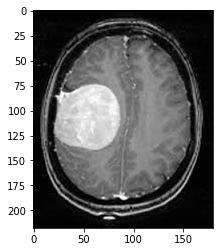

In [13]:
from matplotlib.pyplot import imshow
img = Image.open("yes1.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
confidence = str(res[0][classification]*100)
print(confidence + '% Confidence  ' + names(classification))